# Леонов Христофор ПМ22-4

Бизнес-задача: Разработать модель машинного обучения для классификации опухолей как злокачественные или доброкачественные на основе медицинских данных.    

Цель: Уменьшить время диагностики, повысить точность и ранее выявление раковых заболеваний

Задача машинного обучения: Бинарная классификация

Датасет https://www.kaggle.com/datasets/erdemtaha/cancer-data


## Первичный анализ данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics
from scipy import stats

In [ ]:
data = pd.read_csv('Cancer_Data.csv')
df = pd.DataFrame(data)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Описание датасета

#### Набор данных содержит уникальный идентификатор каждого пациента, тип рака (диагноз), визуальные характеристики рака и средние значения этих характеристик.

диагноз                
1            средний_радиус          
2            средняя_текстура        
3            средний_периметр      
4            средняя_площадь         
5            средняя_гладкость        
6            средняя_компактность     
7            средняя_вогнутость     
8            среднее_количество_вогнутых_точек  
9            средняя_симметрия       
10           средняя_фрактальная_размерность  
11           радиус_se               
12           текстура_se             
13           периметр_se              
14           площадь_se            
15           гладкость_se           
16           компактность_se        
17           вогнутость_se           
18           количество_вогнутых_точек_se
19           симметрия_se            
20           фрактальная_размерность_se  
21           худший_радиус           
22           худшая_текстура         
23           худший_периметр      
24           худшая_площадь           
25           худшая_гладкость       
26           худшая_компактность      
27           худшая_вогнутость       
28           худшее_количество_вогнутых_точек
29           худшая_симметрия        
30           худшая_фрактальная_размерность

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Предобработка данных

In [ ]:
df = df.drop(columns = ['id','Unnamed: 32'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df['diagnosis'] = df['diagnosis'].replace({'M' : 1 , 'B' : 0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


diagnosis
0    357
1    212
Name: count, dtype: int64

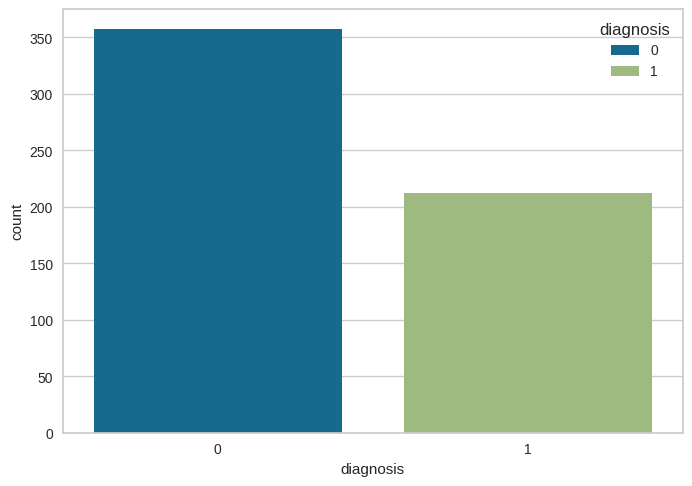

In [ ]:
sns.countplot(x='diagnosis',hue='diagnosis',data = df)
df['diagnosis'].value_counts()

Распределение целевой переменной достаточно равномерное, 60% и 40%

In [ ]:
z_scores = pd.DataFrame(stats.zscore(df), columns=df.columns)
z_scores.describe().round(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,...,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-0.771,-2.030,-2.229,-1.985,-1.454,-3.112,-1.610,-1.115,-1.262,-2.744,...,-1.727,-2.224,-1.693,-1.222,-2.683,-1.444,-1.306,-1.745,-2.161,-1.602
25%,-0.771,-0.689,-0.726,-0.692,-0.667,-0.711,-0.747,-0.744,-0.738,-0.703,...,-0.675,-0.749,-0.690,-0.642,-0.691,-0.681,-0.757,-0.756,-0.642,-0.692
50%,-0.771,-0.215,-0.105,-0.236,-0.295,-0.035,-0.222,-0.342,-0.398,-0.072,...,-0.269,-0.044,-0.286,-0.341,-0.047,-0.270,-0.218,-0.223,-0.127,-0.216
75%,1.298,0.469,0.584,0.500,0.364,0.636,0.494,0.526,0.647,0.531,...,0.522,0.658,0.540,0.358,0.598,0.540,0.531,0.713,0.450,0.451
max,1.298,3.971,4.652,3.976,5.251,4.771,4.568,4.244,3.928,4.485,...,4.094,3.886,4.287,5.930,3.955,5.113,4.701,2.686,6.046,6.847


In [ ]:
# Удалим значения, выходящие за пороговое z-score
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]
data_clean = df.drop(outliers.index)
rows_removed = df.shape[0] - data_clean.shape[0]
print(f'было удалено {rows_removed} строк')

В результате анализа было удалено 74 строк


diagnosis
0    332
1    163
Name: count, dtype: int64

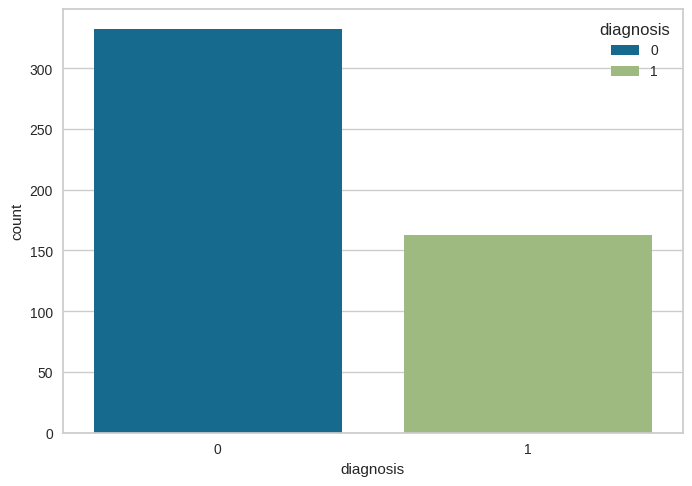

In [ ]:
sns.countplot(x='diagnosis',hue='diagnosis',data = data_clean)
data_clean['diagnosis'].value_counts()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = data_clean.drop("diagnosis",axis=1)
y = data_clean["diagnosis"]

X_over, y_over=RandomOverSampler().fit_resample(X,y) #Oversampling

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify=y_over, random_state=3)

In [ ]:
y_train.value_counts()

diagnosis
1    249
0    249
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

diagnosis
0    83
1    83
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

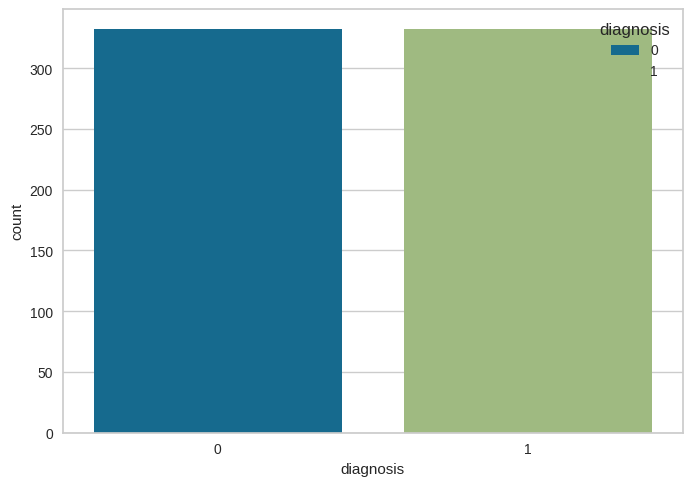

In [ ]:
sns.countplot(x='diagnosis',hue='diagnosis',data = pd.DataFrame(y_over))

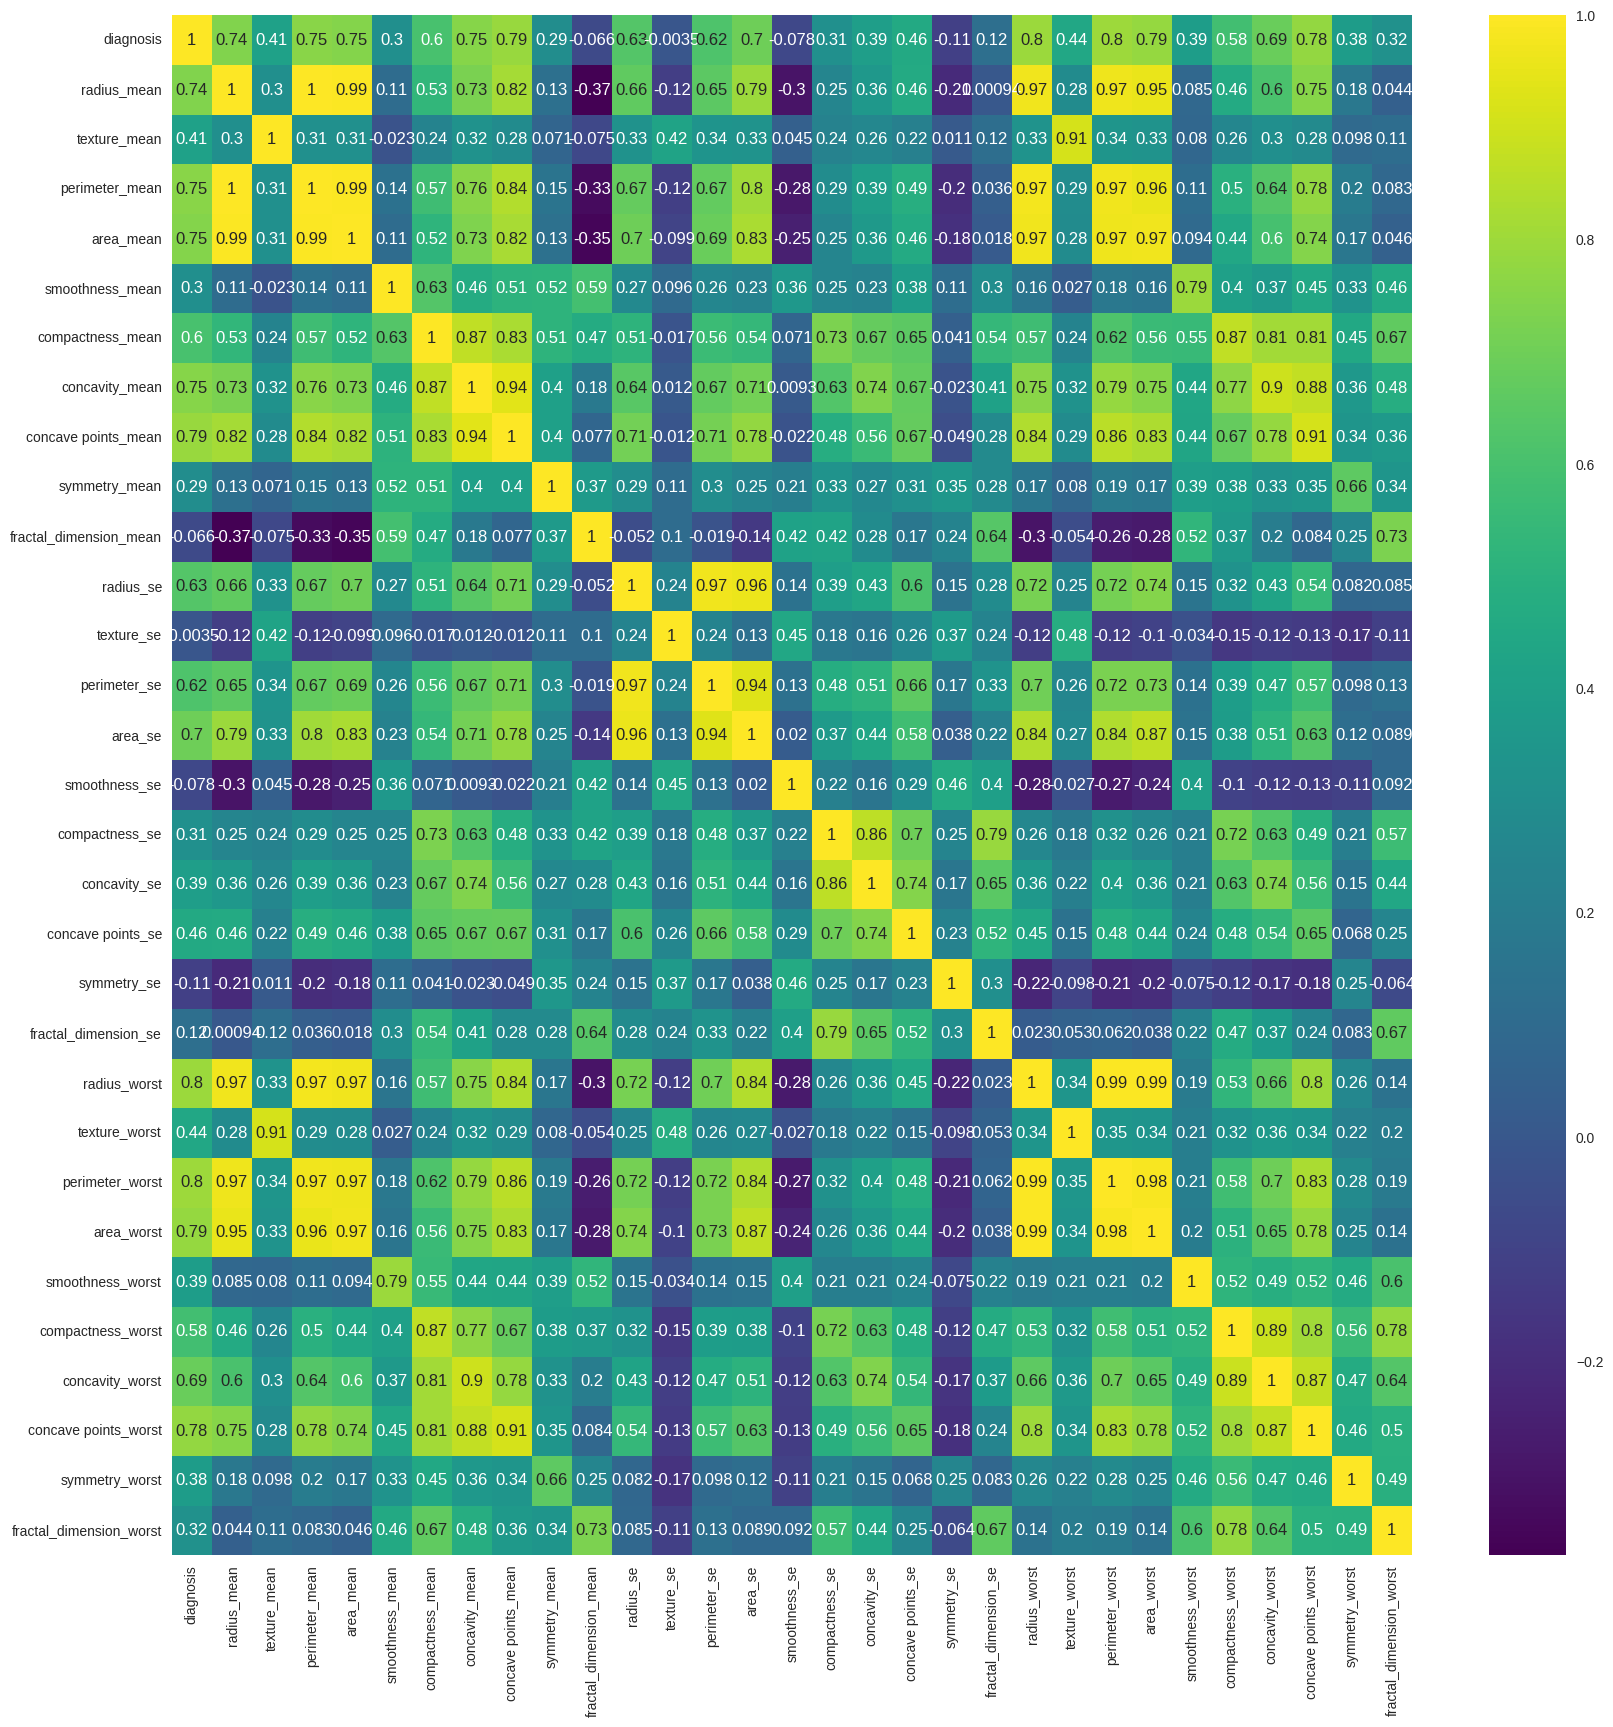

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_clean.corr(),cmap='viridis',annot=True)
plt.show()

<ipython-input-59-154a7cefe1eb>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data_clean, x=column, hue="diagnosis")


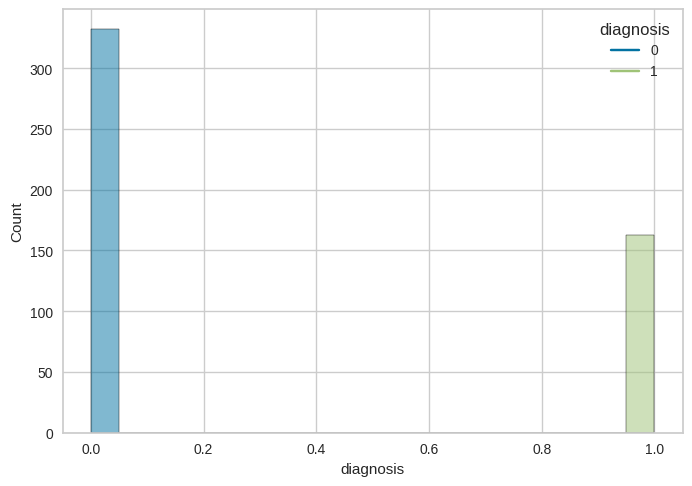

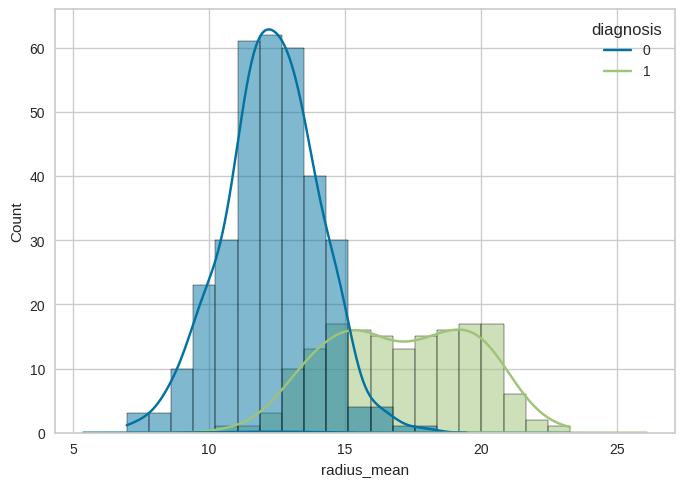

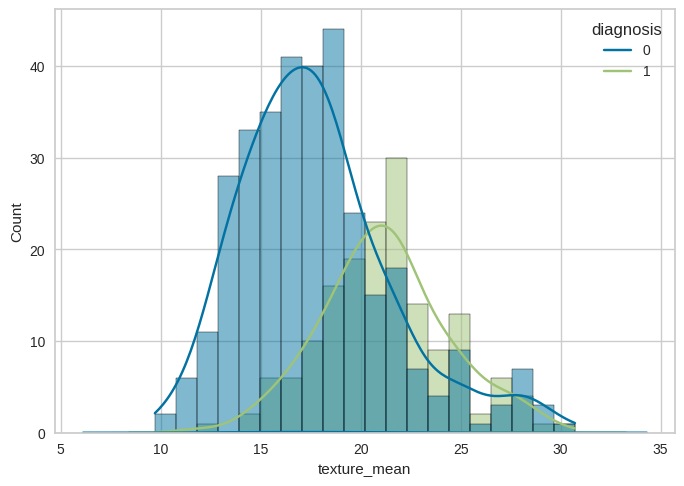

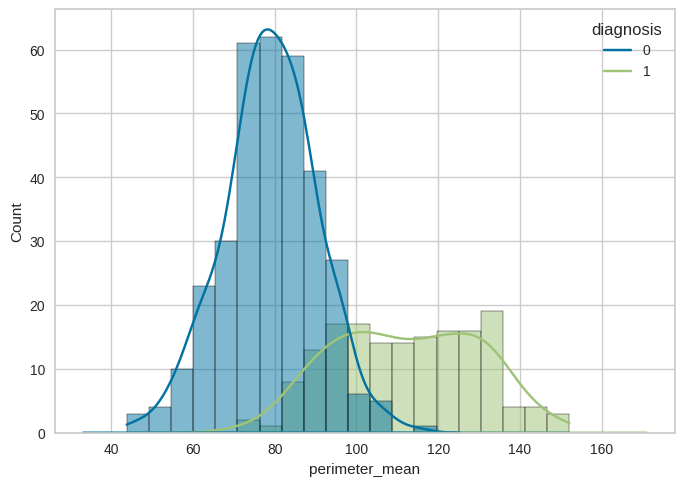

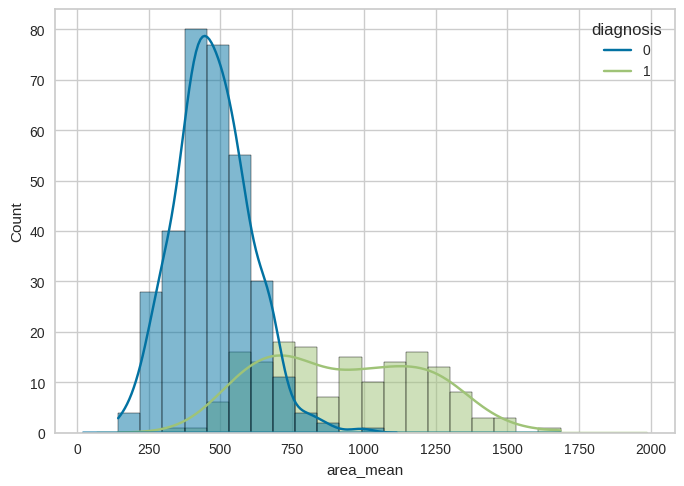

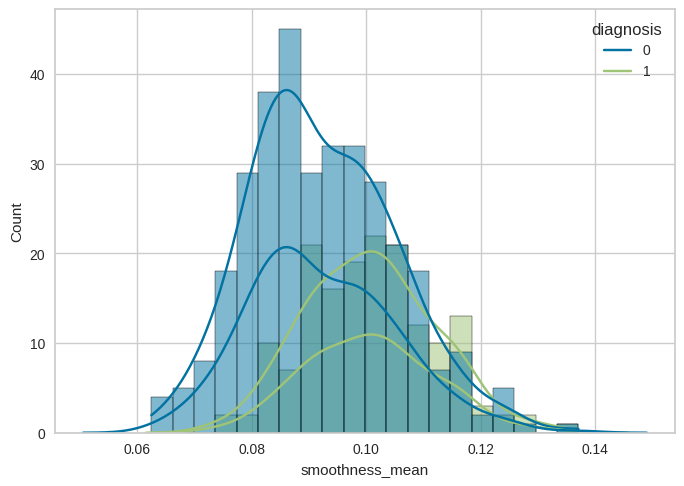

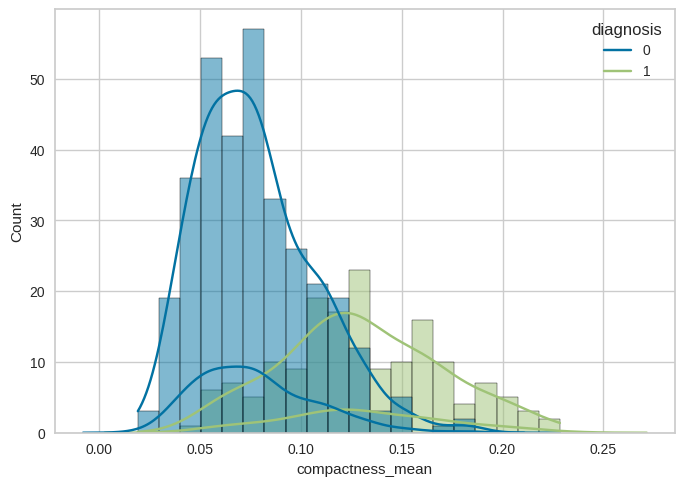

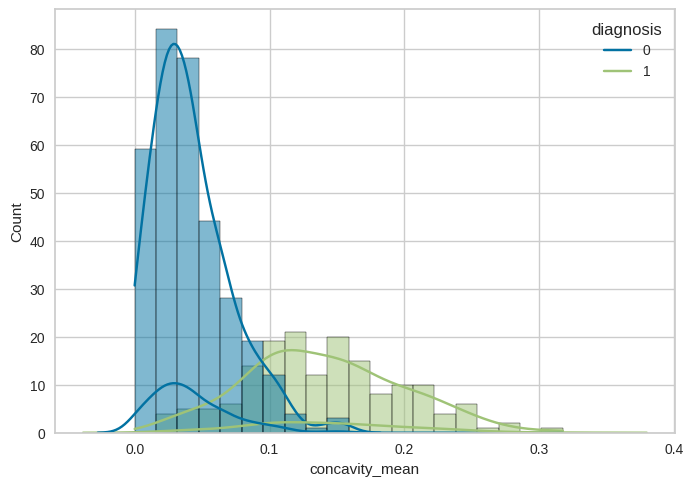

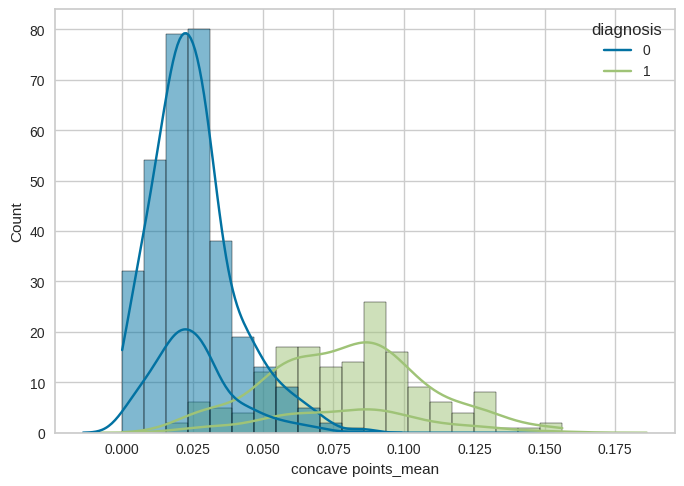

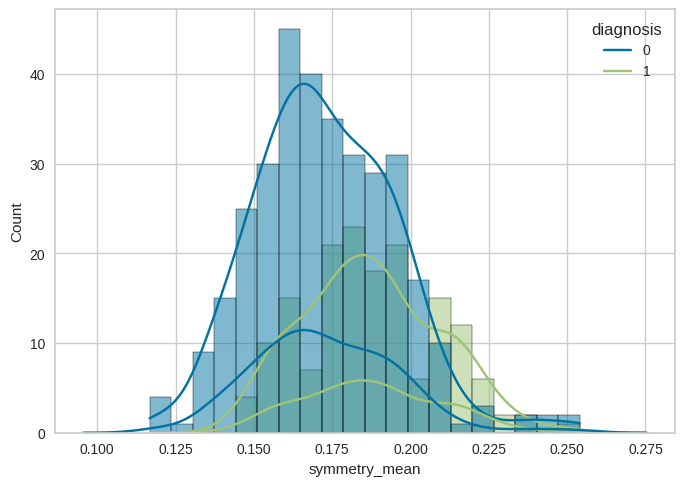

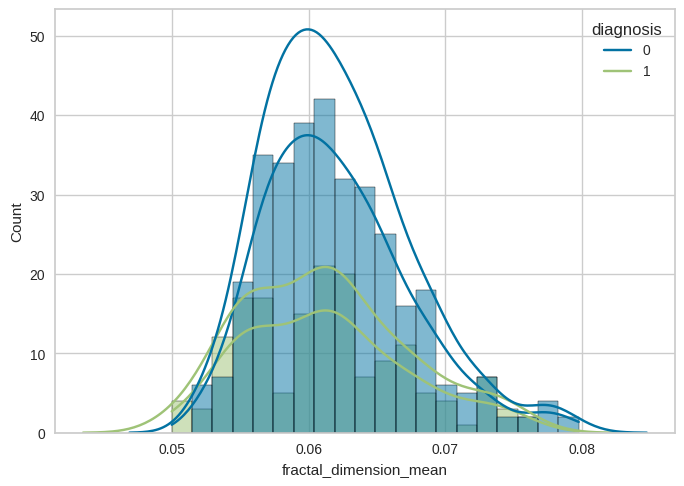

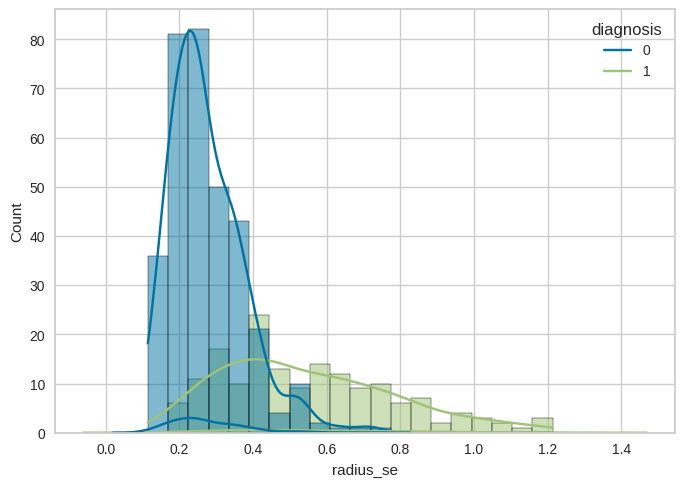

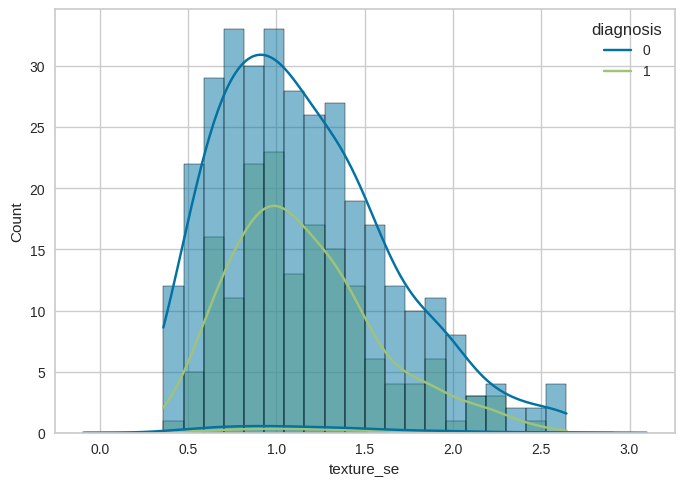

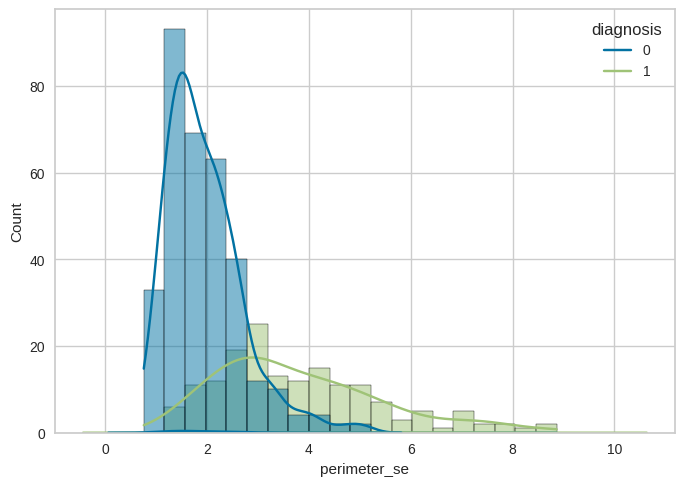

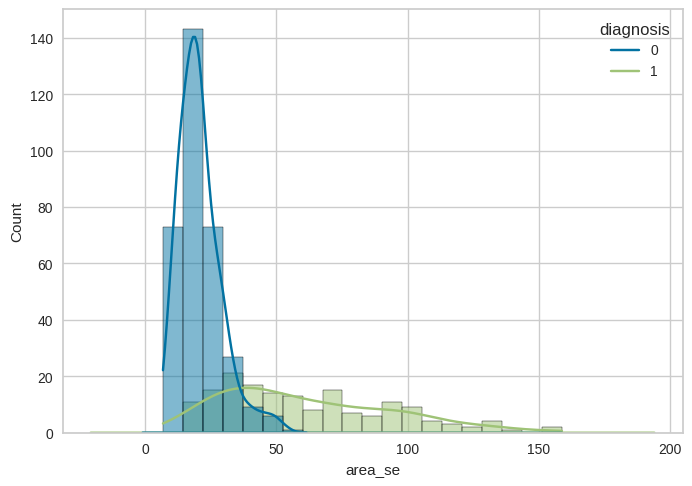

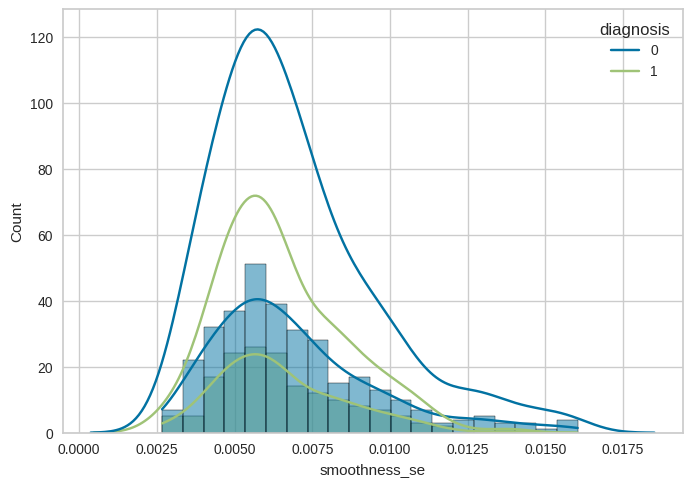

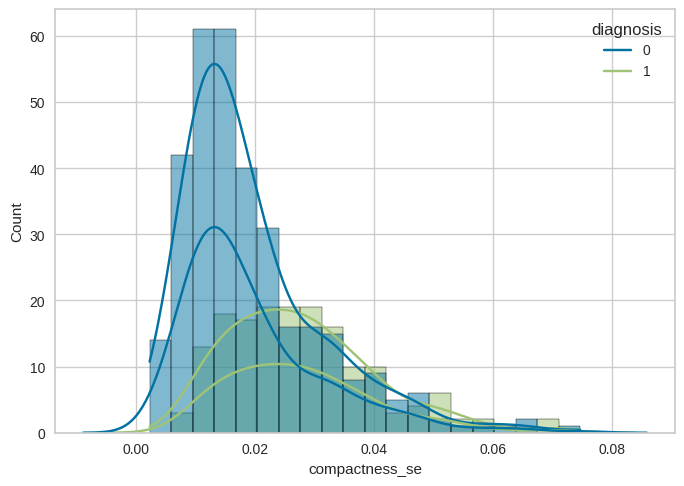

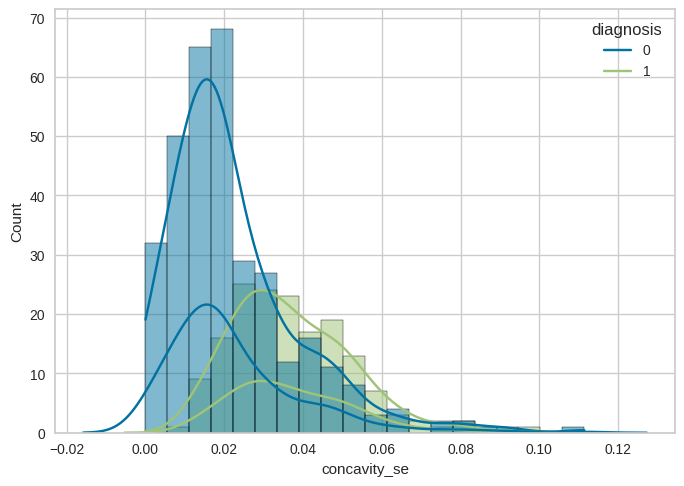

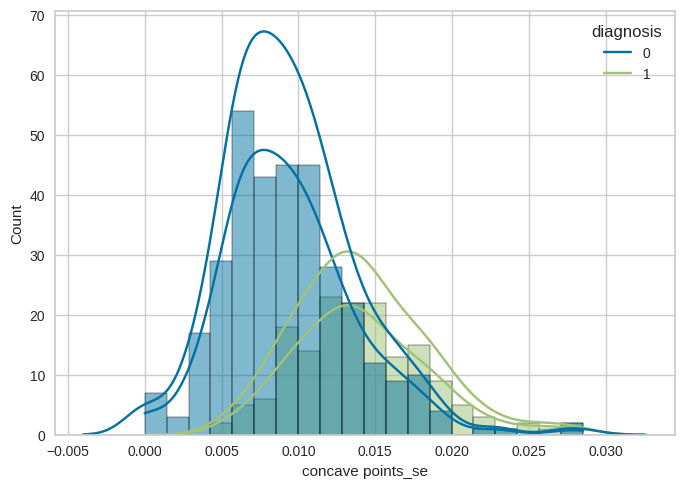

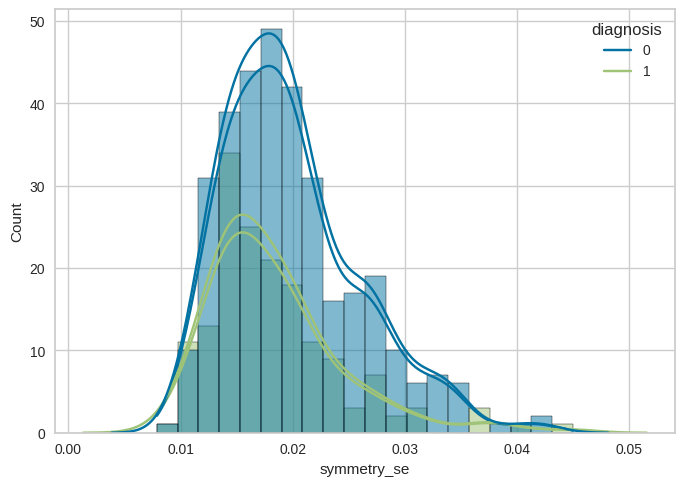

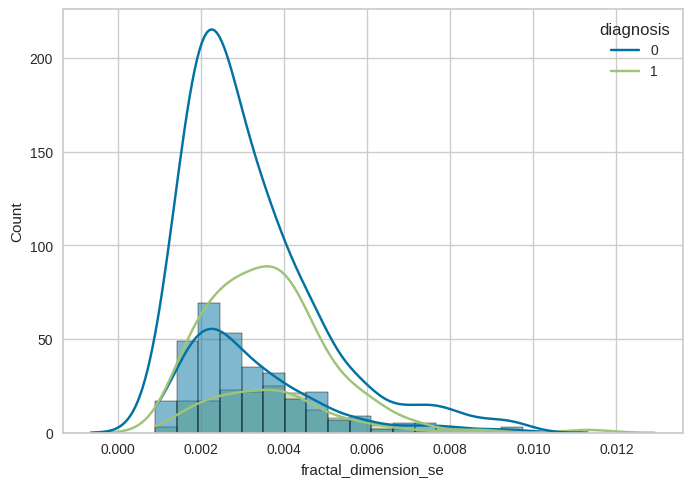

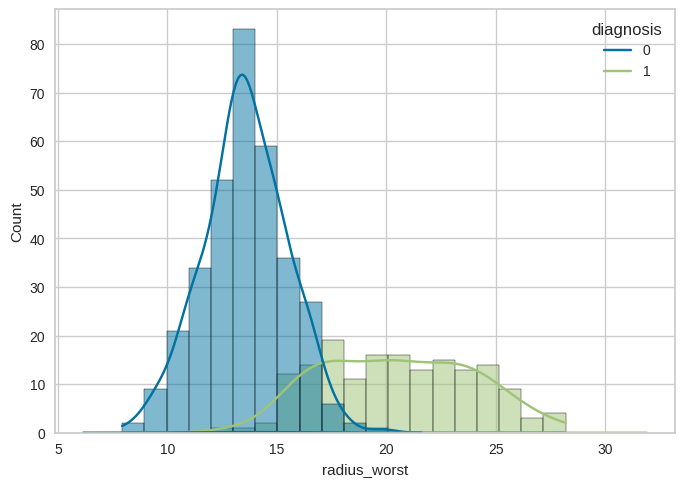

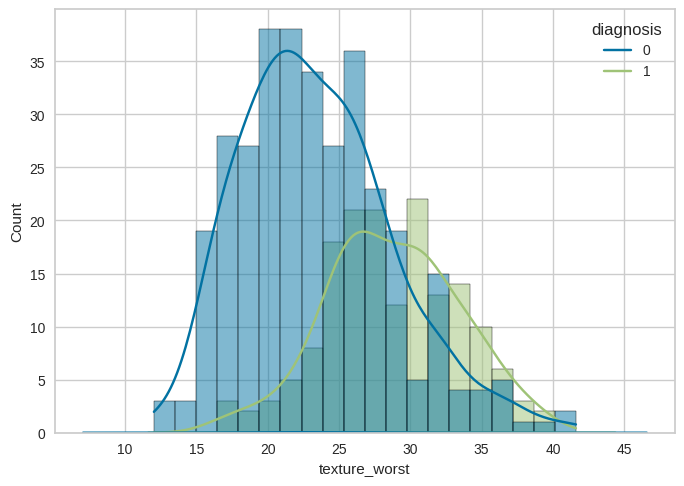

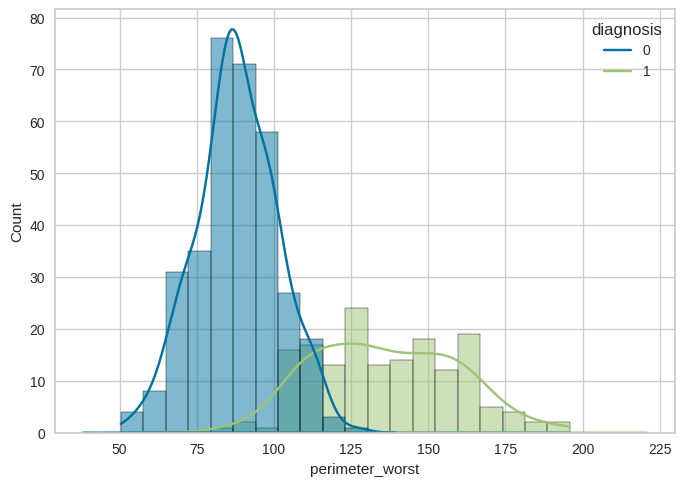

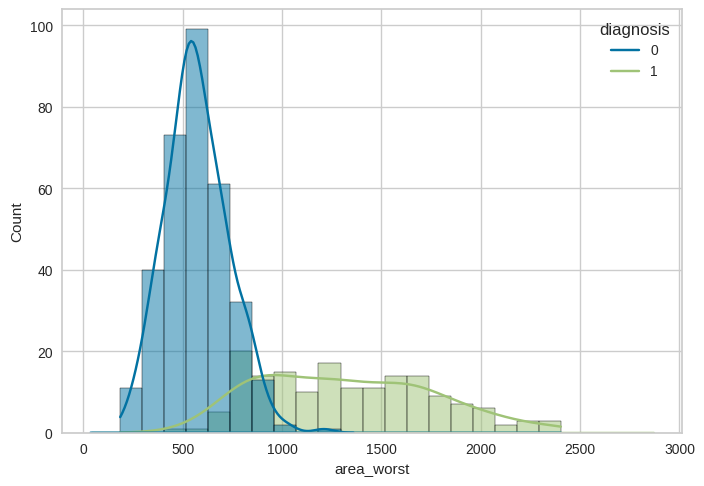

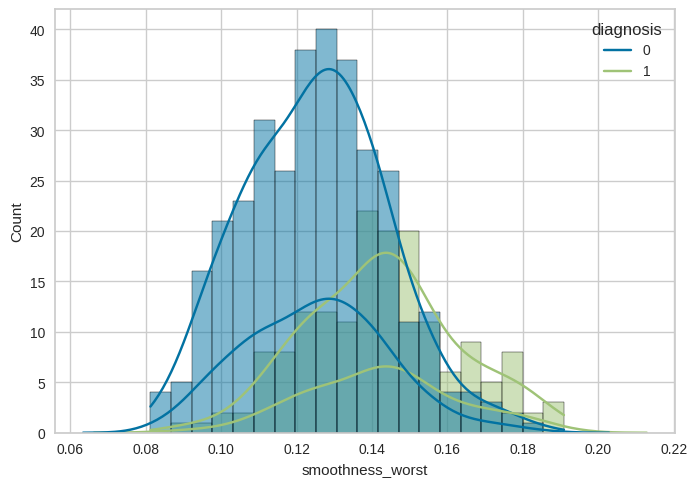

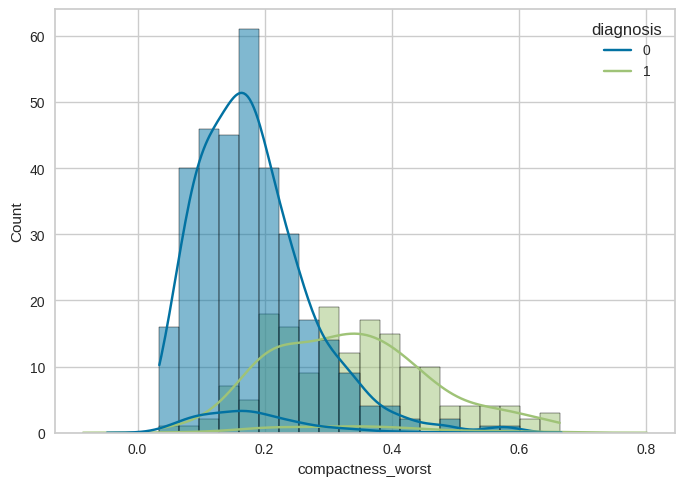

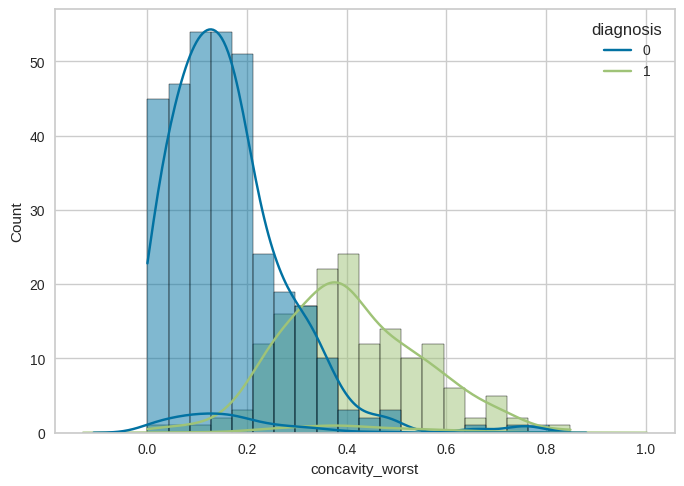

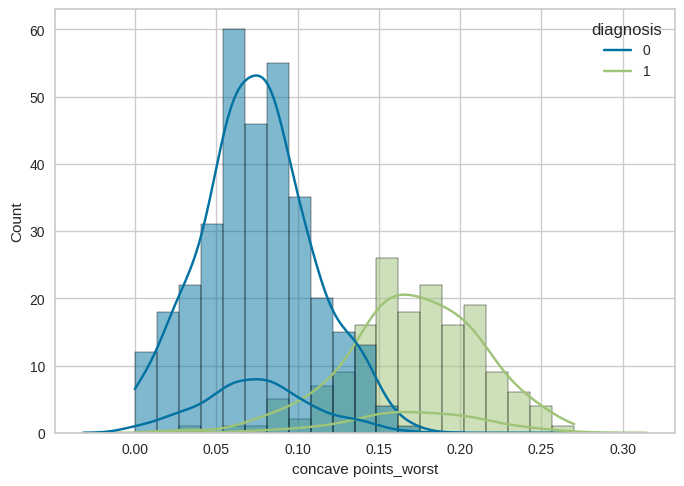

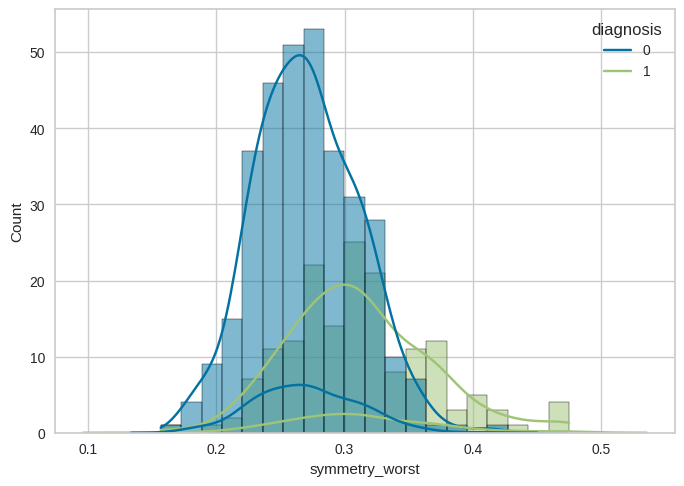

In [ ]:
for column in data_clean.columns[:-1]:
  sns.histplot(data=data_clean, x=column, hue="diagnosis", kde=True, bins=20)
  sns.kdeplot(data=data_clean, x=column, hue="diagnosis")
  plt.show()

## Выбор метрики



1. **Accuracy (точность)**: Доля правильных прогнозов среди всех прогнозов.
   - **Интерпретация**: Показывает общий процент правильно классифицированных опухолей как злокачественных или доброкачественных.

2. **Precision (точность)**: Доля правильных прогнозов о положительном классе (злокачественная опухоль) среди всех прогнозов о положительном классе.
   - **Интерпретация**: Показывает, насколько модель точна в прогнозировании злокачественных опухолей (т.е. насколько мы можем доверять прогнозу "злокачественная").

3. **Recall (полнота)**: Доля правильных прогнозов о положительном классе среди всех реальных случаев положительного класса.
   - **Интерпретация**: Показывает, насколько модель хорошо обнаруживает злокачественные опухоли (т.е. какой процент реальных злокачественных опухолей мы можем обнаружить).

4. **F1-score**: Среднее гармоническое precision и recall.
   - **Интерпретация**: Балансирует Precision и Recall, важна, когда необходимо учитывать баланс между ложноположительными и ложноотрицательными результатами.

5. **ROC AUC**: Площадь под кривой ROC (Receiver Operating Characteristic).
   - **Интерпретация**: Показывает, насколько хорошо модель различает два класса (злокачественная и доброкачественная опухоль).

## Построение моделей

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix, classification_report, roc_auc_score

In [ ]:
models = [LogisticRegression(random_state=42),
          KNeighborsClassifier(),
          SVC(probability=True, random_state=42),
          RandomForestClassifier(random_state=42),
          xgb.XGBClassifier()]
model_names = ['LogisticRegression','KNN','SVM','RandomForest','XGBoost']
auc_scores = []


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
f1_scores = []
recall = []
precision = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    r = recall_score(y_test,y_pred)
    p = precision_score(y_test,y_pred)
    f1_scores.append(f1)
    recall.append(r)
    precision.append(p)
    print('%s: F1-score = %0.3f' % (name, f1))
    print('%s: Precision = %0.3f' % (name, p))
    print('%s: Recall = %0.3f' % (name, r))
    print('\n')




average_f1_score = sum(f1_scores) / len(f1_scores)
print('Average F1-score:', average_f1_score)

LogisticRegression: F1-score = 0.946
LogisticRegression: Precision = 0.940
LogisticRegression: Recall = 0.952


KNN: F1-score = 0.926
KNN: Precision = 0.880
KNN: Recall = 0.976


SVM: F1-score = 0.918
SVM: Precision = 0.897
SVM: Recall = 0.940


RandomForest: F1-score = 0.982
RandomForest: Precision = 0.965
RandomForest: Recall = 1.000


XGBoost: F1-score = 0.988
XGBoost: Precision = 0.976
XGBoost: Recall = 1.000


Average F1-score: 0.9519625775548499


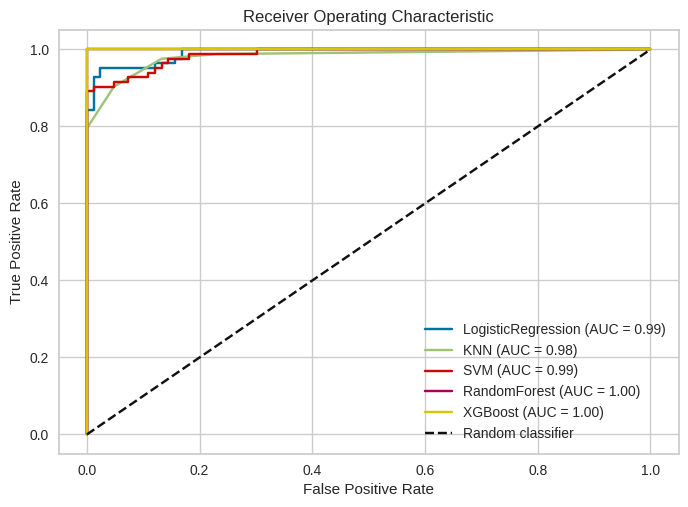

In [ ]:
for model,name in zip(models,model_names):
    model.fit(X_train,y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
    auc_score = auc(fpr,tpr)
    auc_scores.append(auc_score)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, auc_score))

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

По всем метрикам моежм увидеть, что модель случайного леса показывает лучшие результаты

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        83
           1       0.97      1.00      0.98        83

    accuracy                           0.98       166
   macro avg       0.98      0.98      0.98       166
weighted avg       0.98      0.98      0.98       166



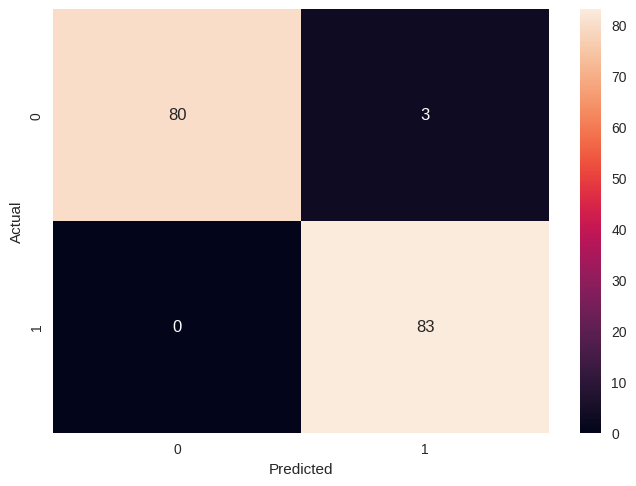

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier().fit(X_train, y_train)
y_pred = model_RF.predict(X_test)

confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion,annot=True, fmt='0')
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Определяем модель
RF = RandomForestClassifier()

# Гиперпараметры для настройки
n_estimators = [100, 200, 300, 400, 500]
max_depth = [None, 10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Словарь с гиперпараметрами
params_rf = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Настройка гиперпараметров с использованием GridSearchCV
RF_grid = GridSearchCV(estimator=RF, param_grid=params_rf, refit=True, verbose=0, n_jobs=-1)
RF_grid.fit(X_train, y_train.ravel())

# Выводим лучшие параметры и лучший результат
print(f"Best parameters: {RF_grid.best_params_}")
print(f"Best score: {RF_grid.best_score_}")

Best parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9799393939393939


In [ ]:
RF1 = RandomForestClassifier(bootstrap = False, max_depth = 30, min_samples_leaf = 2, min_samples_split = 2,n_estimators = 100)
RF1.fit(X_train,y_train.ravel())
y_pred = RF1.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        83
           1       0.99      1.00      0.99        83

    accuracy                           0.99       166
   macro avg       0.99      0.99      0.99       166
weighted avg       0.99      0.99      0.99       166



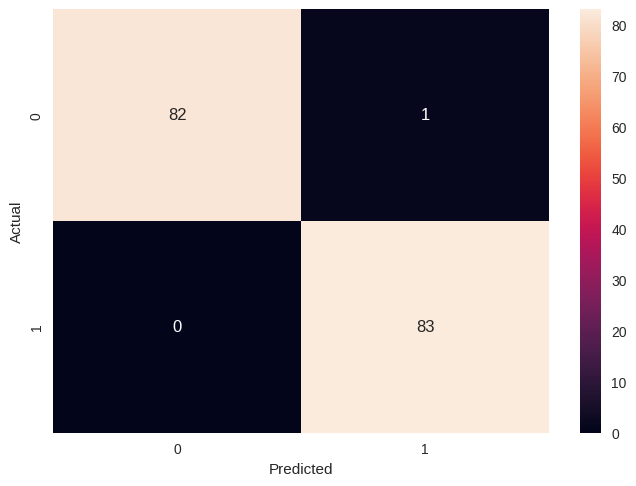

In [ ]:
y_pred = RF1.predict(X_test)

confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion,annot=True, fmt='0')
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test,y_pred))

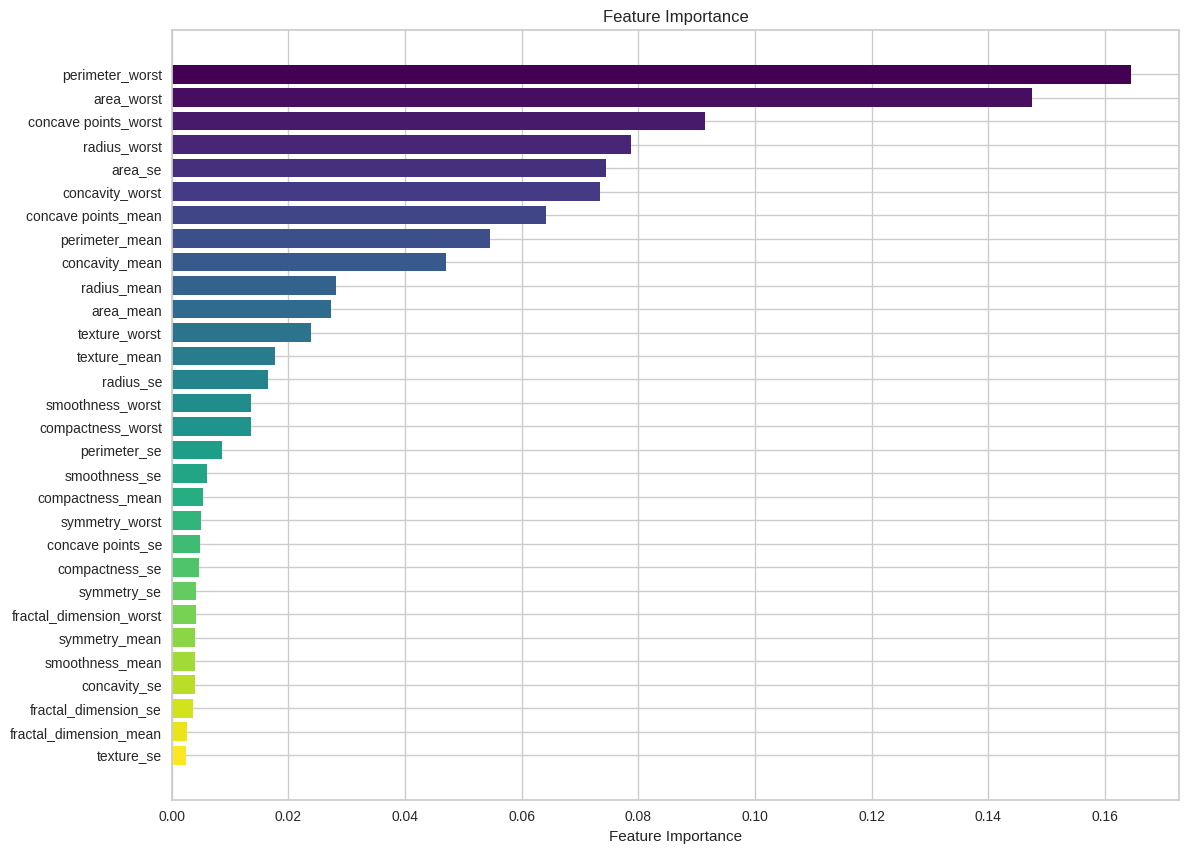

In [ ]:
feature_importance = RF1.feature_importances_

sorted_idx = feature_importance.argsort()[::-1]

colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))

plt.figure(figsize=(13, 10))
plt.barh(range(X_train.shape[1]), feature_importance[sorted_idx], color=colors)
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        83
           1       0.98      1.00      0.99        83

    accuracy                           0.99       166
   macro avg       0.99      0.99      0.99       166
weighted avg       0.99      0.99      0.99       166



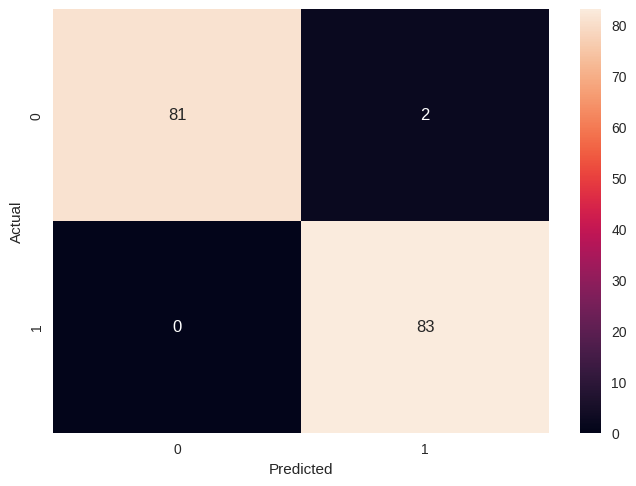

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion,annot=True, fmt='0')
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test,y_pred))